#**Assignment 3 and Project** 
**Big Data AnaLytics**


---




1.   Umair Ahmad [i21-2087]
2.   Khadija Mahmood [i21-2313]      
            
                  



 

#Introduction

---

**Learning Goals & Outcomes**
To Learn to analyze substantial real-world big data of a social network (1.69GB in
size).
o Explore effective use of Apache Kafka to process data.
o Applying graph mining algorithms on streaming data.
o Dynamic Visualizations.



##Input Data

Pokec is the most popular online social network in Slovakia. Pokec has been
provided for more than 10 years and connects more than 1.6 million people. Datasets
contain anonymized data of the whole network. Profile data contains gender, age,
hobbies, interest, education, etc. Profile data are in the Slovak language. Friendships in
Pokec are oriented.
This social network has connected more than 1.6 million people and posses more
than 50 attributes for each person.


#Installation Of Kafka

---



We have run the following steps to run the Kafka server.
We required java before installing kafka on local PC
Downloading the KAFKA  from https://kafka.apache.org/downloads”


•	mkdir kafka 
•	cd kafka
•	Tar –xvzf ~/Downloads/kafka.tgz --strip 1


Check the properties:
bin/kafka-server-start.sh config/server.properties but got the error 


then run Zookeeper by running the command
•	bin/zookeeper-server-start.sh config/zookeeper.properties
Ran the  following command in the kafka folder

•	bin/kafka-server-start.sh config/server.properties
After this running on localhost:2181 
▪ 1 Kafka server (broker) running on localhost:9092
Listing out the topics and generating the new topic.
bin/kafka-topics.sh --bootstrap-server localhost:9092 –list
•	cd /tmp/kafka-logs 
•	 ls 
•	 cd city-0/ 
•	Ls





These are the screenshots of initializing Kafka
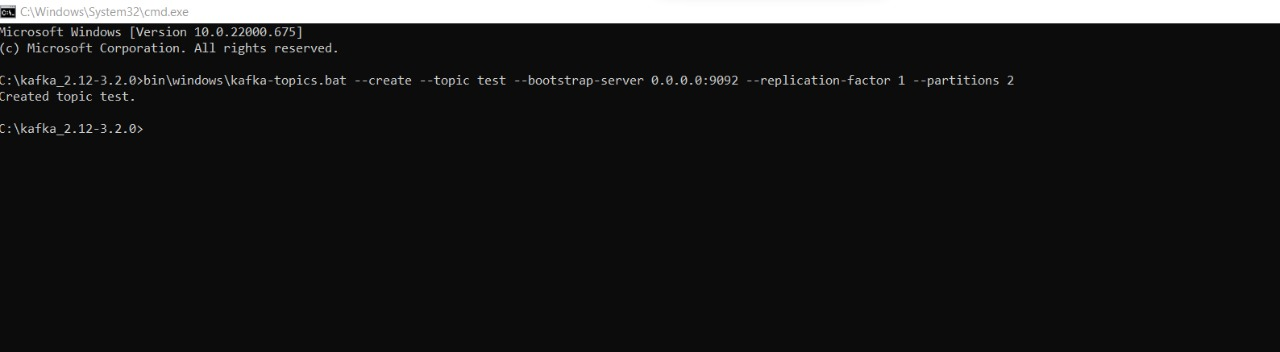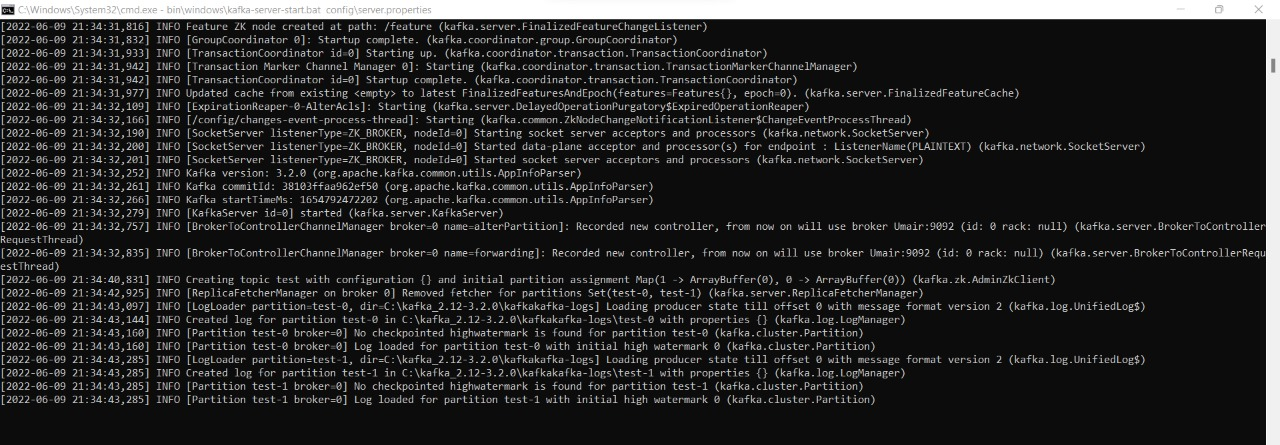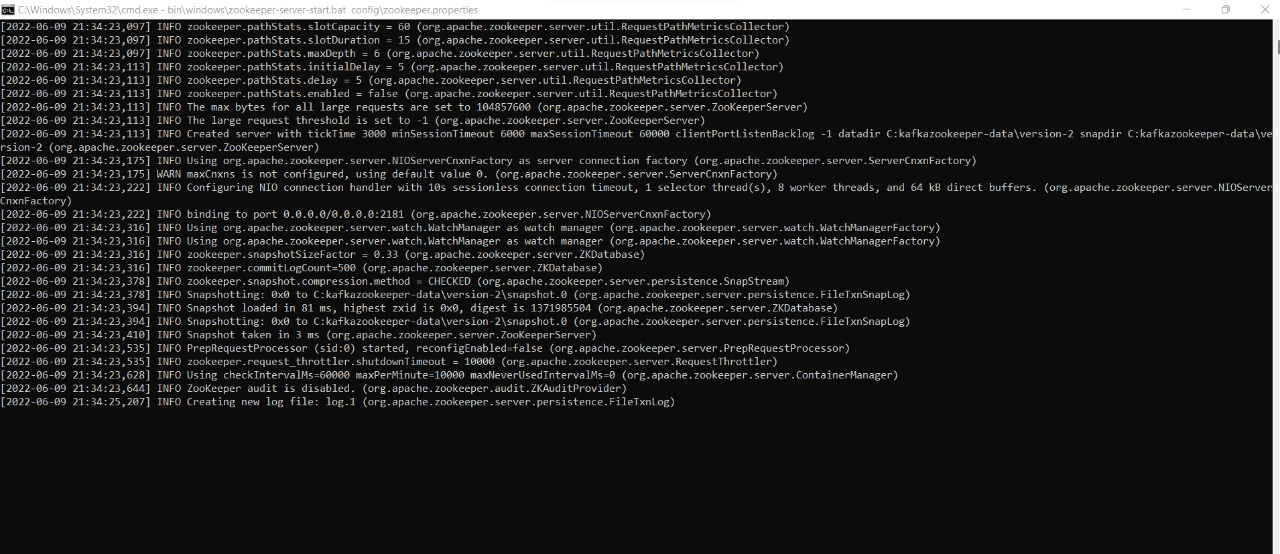

# Task 1: Data Streaming
a. You have to read and store the profile file before streaming relationship data so
that you can process nodes. To emulate streaming data you have to read the
relationship file in batches/chunks after the fixed time interval using Kafka.

---


b. You also need to store streaming data in the Database(The consumer will store the
streaming data in a Database).

#Producer

Installation

In [ ]:
!pip install kafka-python
!pip install pyarrow
!pip install fastparquet

importing libraries

In [ ]:
import json
from json import dumps
from time import sleep
from kafka import KafkaProducer
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [ ]:
f = open("C:/Users/uauau/Downloads/soc-pokec-profiles.txt", "r",encoding="utf8")
i=0
features=["user_id","public","completion_percentage","gender","region","last_login"
    ,"registration"
    ,"AGE"
    ,"body"
    ,"I_am_working_in_field"
    ,"spoken_languages"
    ,"hobbies"
    ,"I_most_enjoy_good_food"
    ,"pets"
    ,"body_type"
    ,"my_eyesight"
    ,"eye_color"
    ,"hair_color"
    ,"hair_type"
    ,"completed_level_of_education"
    ,"favourite_color"
    ,"relation_to_smoking"
    ,"relation_to_alcohol"
    ,"sign_in_zodiac"
    ,"on_pokec_i_am_looking_for"
    ,"love_is_for_me"
    ,"relation_to_casual_sex"
    ,"my_partner_should_be"
    ,"marital_status"
    ,"children"
    ,"relation_to_children"
    ,"I_like_movies"
    ,"I_like_watching_movie"
    ,"I_like_music"
    ,"I_mostly_like_listening_to_music"
    ,"the_idea_of_good_evening"
    ,"I_like_specialties_from_kitchen"
    ,"fun"
    ,"I_am_going_to_concerts"
    ,"my_active_sports"
    ,"my_passive_sports"
    ,"profession"
    ,"I_like_books"
    ,"life_style"
    ,"music"
    ,"cars"
    ,"politics"
    ,"relationships"
    ,"art_culture"
    ,"hobbies_interests"
    ,"science_technologies"
    ,"computers_internet"
    ,"education"
    ,"sport"
    ,"movies"
    ,"travelling"
    ,"health"
    ,"companies_brands"
    ,"more"
]
lst=[]
i=0
for x in f:
    x=str(x).split('\t')
    x.pop()
    lst.append(x)
    i=i+1
    if(i==100):
        break

In [ ]:
import pandas as pd
df = pd.DataFrame(lst,columns =features)
df.to_csv("pokec.csv")

In [ ]:
import pandas as pd
send_data = pd.read_csv("C:/Users/uauau/OneDrive/Desktop/pokec.csv")
short_data=send_data

Droping some irrelevant features

In [ ]:
drop_features=["index"
    ,"fun"
    ,"I_am_going_to_concerts"
    ,"my_active_sports"
    ,"my_passive_sports"
    ,"profession"
    ,"I_like_books"
    ,"life_style"
    ,"music"
    ,"cars"
    ,"politics"
    ,"relationships"
    ,"art_culture"
    ,"hobbies_interests"
    ,"science_technologies"
    ,"computers_internet"
    ,"education"
    ,"sport"
    ,"movies"
    ,"travelling"
    ,"health"
    ,"companies_brands"
    ,"more"
]
short_data=send_data.drop(columns=drop_features)

In [ ]:
short_data.columns

Index(['gender', 'AGE', 'actual_region', 'actual_hair_color', 'actual_spoken',
       'actual_height_cm', 'actual_eye_color', 'actual_relation_to_alcohol',
       'registration_year', 'actual_my_eyesight'],
      dtype='object')

In [ ]:
short_data

,gender,AGE,actual_region,actual_hair_color,actual_spoken,actual_height_cm,actual_eye_color,actual_relation_to_alcohol,registration_year,actual_my_eyesight
0,0,0,zilinsky kraj,cierne,1,166.0,zelene,pijem,2007,vyborny
1,1,21,zilinsky kraj,Vague,1,185.0,Vague,nepijem,2008,vyborny
2,0,21,zilinsky kraj,Vague,2,170.0,hnede,pijem,2008,vyborny
3,0,17,zilinsky kraj,hnede,2,170.0,modre,pijem,2007,vyborny
4,1,23,zilinsky kraj,hnede,3,180.0,modre,pijem,2007,vyborny
...,...,...,...,...,...,...,...,...,...,...
335881,0,39,nitriansky kraj,hnede,1,178.0,hnede,abstinent,2007,vyborny
335882,1,0,bratislavsky kraj,cierne,2,174.0,cierne,abstinent,2011,Vague
335883,1,36,trenciansky kraj,hnede,3,180.0,zelene,pijem,2008,vyborny
335884,1,32,bratislavsky kraj,hnede,2,178.0,modre,pijem,2012,Vague


#Creating Kafka Producer

In [ ]:
producer = KafkaProducer(bootstrap_servers='localhost:9092',value_serializer = lambda x: dumps(x).encode('utf-8'))

##Transfering of profile data

In [ ]:
for i in range(len(short_data)) :
    value=str(short_data.iloc[i, 0])+ ','+str(short_data.iloc[i, 1])+','+str(short_data.iloc[i, 2])+','+str(short_data.iloc[i, 3])+','+str(short_data.iloc[i, 4])+','+str(short_data.iloc[i, 5])+','+str(short_data.iloc[i, 0])+','+str(short_data.iloc[i, 6])+','+str(short_data.iloc[i, 7])+','+str(short_data.iloc[i, 8])+','+str(short_data.iloc[i, 9])
    print(value)
    producer.send('test',value)
    sleep(2)

In [ ]:
import csv
data = open("C:/Users/uauau/OneDrive/Desktop/soc-pokec-relationships.txt", 'r')
reader = csv.reader(data, delimiter='\t')
allRows = [tuple(row) for row in reader]
del data
del reader
len(allRows)

30622564

In [ ]:
allRows[0]

('1', '13')

##Transfering of relationship data

In [ ]:
for i in allRows :
    value=str(i[0])+','+str(i[1])
    print(value)
    producer.send('test',value) #posting data
    sleep(2)

#Analysis Report



In task 1 of Data streaming we are assigned to do data streaimg of pokec dataset which is about 1.6 GB and pokec dataset is not so organized and clean dataset. we performed pre-processing for that. 

we face problem while installation.Before installation of Kafka we needed JVM.but there server missing problem Firstly Kafka ran properly but nodes were blocking temporarily and every time we had to create new topic so we deleted the log files to overcome this problem.And we got to know that zookeeper should be firstly running form and we are dependent to create topic before creating producer consumer because both can not send and receive data respectively.We used Kafka Connectors but was getting many errors for the same. After that we learned about using python with kafka but we are dependent to use local setup like jupyter notebook. We couldn't use colab for kafka Streaming. 

We also faced Issues regarding storing big stream data in database, faced database connectivity issues. so we resolved that issue by using real time database which is Firebase Data base


Tools: kafka,Java,Jupyter

